In [1]:
import numpy as np
import csv
import json
import requests
import folium
import urllib

In [2]:
'''Datasæt: https://www.opendata.dk/city-of-copenhagen/monumenter
CSV: https://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=k101:monumenter&outputFormat=csv&SRSNAME=EPSG:4326

1. Hvor mange monumenter er der i København?

2. Hvor mange monumenter bliver vedligeholdt? Dvs. graffitirenhold = ja

3. Lav en funktion som kan finde koordinaterne på et monument baseret på monumentets id eller navn?
	F.eks:
		def monumentById(monumentId):
			return coordinates
	
3.a Vis monument som bliver returneret i metoden, på et kort over københavn ved brug af plotting. (Se afsnittet om 'Folium and Bokeh' under notebooks/03-3 Plotting)

4. Find navnet på monumentet med x og y koordinaterne eller længde- og breddegraderne?
	
	x = 724407.424966
	y = 6175719.798486
	
	MULTIPOINT ((12.555485308174104 55.69383926601615))

5. Lav en metode der optegner alle monumenterne på kortet ved brug af plotting.

6. Gør kortet interaktiv så navnet på monumenterne vises når man trykker på et plot. (Se afsnittet om 'Interactive plots with bokeh' under notebooks/03-3 Plotting)'''

"Datasæt: https://www.opendata.dk/city-of-copenhagen/monumenter\nCSV: https://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=k101:monumenter&outputFormat=csv&SRSNAME=EPSG:4326\n\n1. Hvor mange monumenter er der i København?\n\n2. Hvor mange monumenter bliver vedligeholdt? Dvs. graffitirenhold = ja\n\n3. Lav en funktion som kan finde koordinaterne på et monument baseret på monumentets id eller navn?\n\tF.eks:\n\t\tdef monumentById(monumentId):\n\t\t\treturn coordinates\n\t\n3.a Vis monument som bliver returneret i metoden, på et kort over københavn ved brug af plotting. (Se afsnittet om 'Folium and Bokeh' under notebooks/03-3 Plotting)\n\n4. Find navnet på monumentet med x og y koordinaterne eller længde- og breddegraderne?\n\t\n\tx = 724407.424966\n\ty = 6175719.798486\n\t\n\tMULTIPOINT ((12.555485308174104 55.69383926601615))\n\n5. Lav en metode der optegner alle monumenterne på kortet ved brug af plotting.\n\n6. Gør kortet interaktiv så navnet på mon

In [3]:
filename = 'monumenter.csv'

with open(filename, 'r') as f:
    data = list(csv.reader(f, delimiter=','))
    
df = np.array(data)
df = np.delete(df,0,0)

df

array([['monumenter.1', '49690', 'Efterår', ..., '55.708568', 'Ja',
        'MULTIPOINT ((12.577000674229012 55.70856778229661))'],
       ['monumenter.2', '49865', 'H.W. Meyer', ..., '55.696741', 'Ja',
        'MULTIPOINT ((12.562810238950165 55.69674138769442))'],
       ['monumenter.3', '49866', 'Sigurd Fafnersbane og slange', ...,
        '55.697869', 'Ja',
        'MULTIPOINT ((12.569361482261764 55.69786887177536))'],
       ...,
       ['monumenter.387', '61724', 'Modstandsbevægelsens faldne', ...,
        '55.668805', 'Ja',
        'MULTIPOINT ((12.59523651729718 55.66880512796106))'],
       ['monumenter.388', '65076', 'Kongens Livjægere', ..., '55.697472',
        'Ja', 'MULTIPOINT ((12.588918117651739 55.69747240261654))'],
       ['monumenter.389', '', '', ..., '55.644588', '',
        'MULTIPOINT ((12.613195846431978 55.64458834495136))']],
      dtype='<U84')

In [32]:
# Del 1

df[:,1].size

389

In [35]:
# Del 2

g_mask = (df[:,9] == 'Ja')

df[g_mask][:,1].size

255

In [4]:
# Folium Setup

def get_city_location(city='Copenhagen'):
    url_nomatim_api = 'https://nominatim.openstreetmap.org/search'
    r = requests.get(url_nomatim_api, params={'format': 'json', 'city': city})
    results = r.json()
    location = results[0]
    lat, lon = float(location['lat']), float(location['lon'])
    return lat, lon

def get_geojson(url):
    response = requests.get(url)
    geo_json = response.json()
    return geo_json

cph_lat, cph_lon = get_city_location()
map_osm = folium.Map(location=(cph_lat, cph_lon), zoom_start=10)

In [5]:
# Del 3 + 3.a

tooltip = "Click me!"

def monumentById(monumentid):
    monument_mask = (df[:, 1] == str(monumentid))
    monument = df[monument_mask]
    lat = monument.item(7)
    lon = monument.item(8)
    
    folium.Marker(
        location=[float(lon), float(lat)], 
        popup=monument.item(2), 
        tooltip=tooltip
    ).add_to(map_osm)
    
    display(map_osm)
    
    return lat, lon

monumentById(61724)

('12.595237', '55.668805')

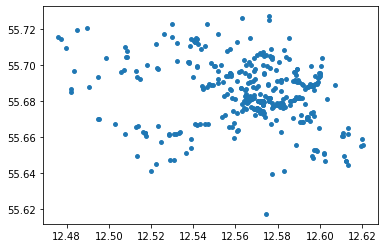

In [38]:
# Del 5
import matplotlib.pyplot as plt

def plot_monuments(dataframe):
    plt.figure()
    lat_list = list(map(float,df[:,7]))
    lon_list = list(map(float,df[:,8]))
    plt.scatter(lat,lon,s=15)


plot_monuments(df)



In [69]:
# Del 6

'''Havde issues med at få bokeh til at virke når vi plottede data ind'''